In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style("ticks")
hfont = {'fontname':'Myriad Pro'}
import matplotlib.ticker as mtick
from matplotlib import gridspec
from matplotlib import colors
import sys
sys.path.append(os.path.join(Path(os.getcwd()).parents[0], "functions"))
import warnings
warnings.filterwarnings('ignore')
import helper_functions as hfn

In [2]:
path = Path(os.getcwd()).parents[0]
fracpath = os.path.join(path, 'input_fraction')

fracpath_csv = os.path.join(fracpath, 'csv')

figpath = os.path.join(path, 'Figures')
hfn.dir_check(figpath)
    
figs42path = os.path.join(figpath, 'FigS12+S13')
hfn.dir_check(figs42path)

figs42panelpaths = os.path.join(figs42path, 'panels')
hfn.dir_check(figs42panelpaths)

In [3]:
pars_df = pd.read_hdf(os.path.join(fracpath, 'linfit_pars.h5'))
pars_df_l = pd.read_hdf(os.path.join(fracpath, 'linfit_pars_lowstarters.h5'))
pars_df_h = pd.read_hdf(os.path.join(fracpath, 'linfit_pars_highstarters.h5'))

In [4]:
df_frac = pd.read_csv(os.path.join(fracpath_csv, 'df_all_fraction.csv'))
df_ci = pd.read_csv(os.path.join(fracpath_csv, 'df_all_ci.csv'))

In [5]:
thisdf = df_frac.copy()
thisdf_l = df_frac[df_frac.starter<200]
thisdf_h = df_frac[df_frac.starter>200]

In [6]:
thiscidf = df_ci.copy()
thiscidf_l = df_ci[df_ci.starter<200]
thiscidf_h = df_ci[df_ci.starter>200]

In [7]:
areas_sel = ['VISp','VISpm','VISl', 'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd', 'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

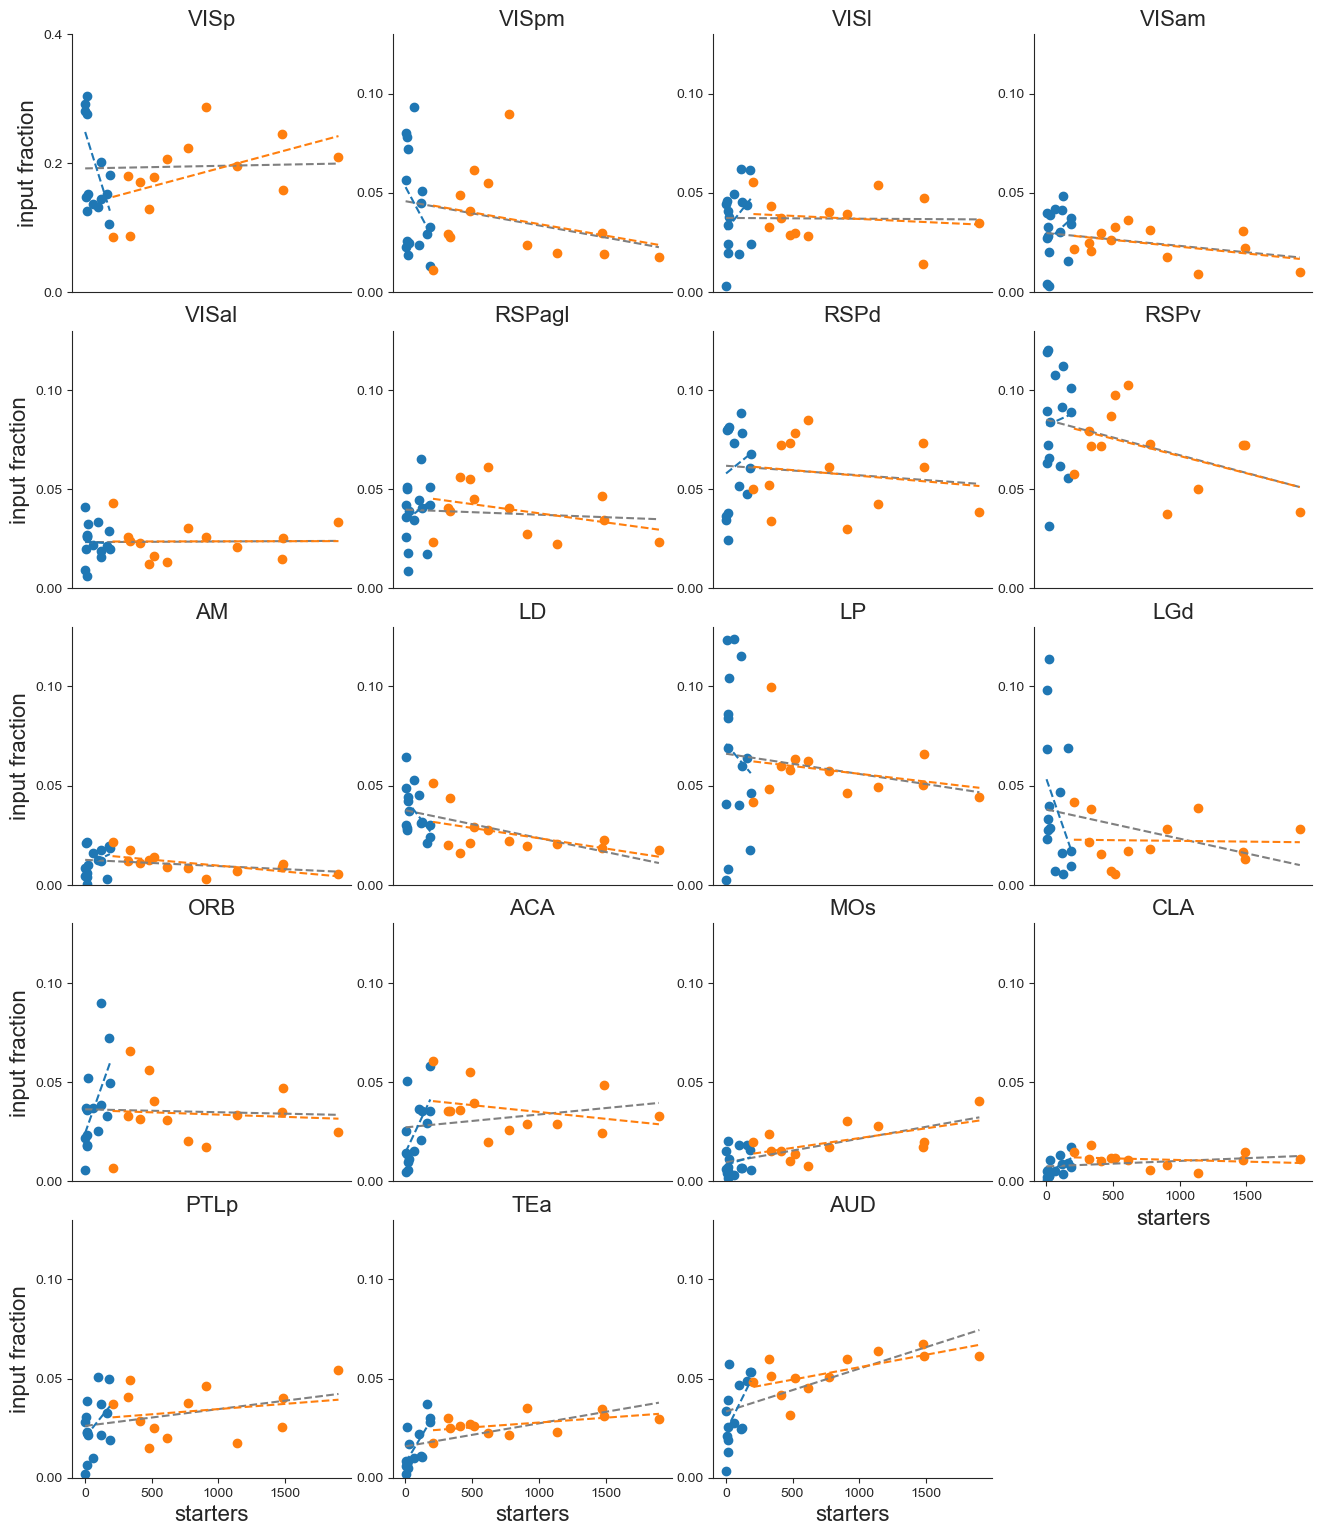

In [8]:
f1 = plt.figure(figsize = (16,38))



gs = f1.add_gridspec(10,4, width_ratios=[1, 1, 1,1],
         wspace=0.15, hspace=0.15)#, top=0.95, bottom=0.05, left=0.17, right=0.845)

ax = {}

for i, area in enumerate(areas_sel):
    thispars = pars_df[pars_df.area == area]
    thispars_l = pars_df_l[pars_df_l.area == area]
    thispars_h = pars_df_h[pars_df_h.area == area]
    if i%4 ==0 :
        ax[i] = f1.add_subplot(gs[int(i/4):int(i/4)+1, 0:1])
        ax[i].set_ylabel('input fraction', fontsize = 16)
    elif i%4 == 1:
        ax[i] = f1.add_subplot(gs[int(i/4):int(i/4)+1, 1:2])
    elif i%4 ==2 :
        ax[i] = f1.add_subplot(gs[int(i/4):int(i/4)+1, 2:3])
#         ax[i].set_ylabel('input fraction', fontsize = 16)
    else:
        ax[i] = f1.add_subplot(gs[int(i/4):int(i/4)+1, 3:])
#         ax[i].yaxis.set_visible(False)
    ax[i].scatter(thisdf_l['starter'], thisdf_l[area])
    ax[i].scatter(thisdf_h['starter'], thisdf_h[area])
    ax[i].plot(thisdf['starter'],thispars['slope'].values * thisdf['starter'] + thispars['intercept'].values, ls = '--', c = 'grey')
    ax[i].plot(thisdf_l['starter'],thispars_l['slope'].values * thisdf_l['starter'] + thispars_l['intercept'].values, ls = '--', c = 'C0')
    ax[i].plot(thisdf_h['starter'],thispars_h['slope'].values * thisdf_h['starter'] + thispars_h['intercept'].values, ls = '--', c = 'C1')
    ax[i].set_title(area, fontsize = 16)
    ax[i].set_ylim(0, 0.13)
    if area == 'VISp':
        ax[i].set_ylim(0, 0.4)

    plt.locator_params(axis='y', nbins=3)        
        
    if area == 'AUD' or area =='TEa' or area == 'PTLp' or area  == 'CLA':
        ax[i].set_xlabel('starters', fontsize = 16)
    else:
        ax[i].xaxis.set_visible(False)
        
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

plt.savefig(os.path.join(figs42panelpaths, 'figS12a.png'), bbox_inches = None)
plt.savefig(os.path.join(figs42panelpaths, 'figS12a.eps'), bbox_inches = None, format = 'eps')

In [9]:
areas = ['VISp', 'VISpm', 'VISl',
       'VISam', 'VISal', 'RSPagl', 'RSPd', 'RSPv', 'AM', 'LD', 'LP', 'LGd',
       'ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa', 'AUD',]

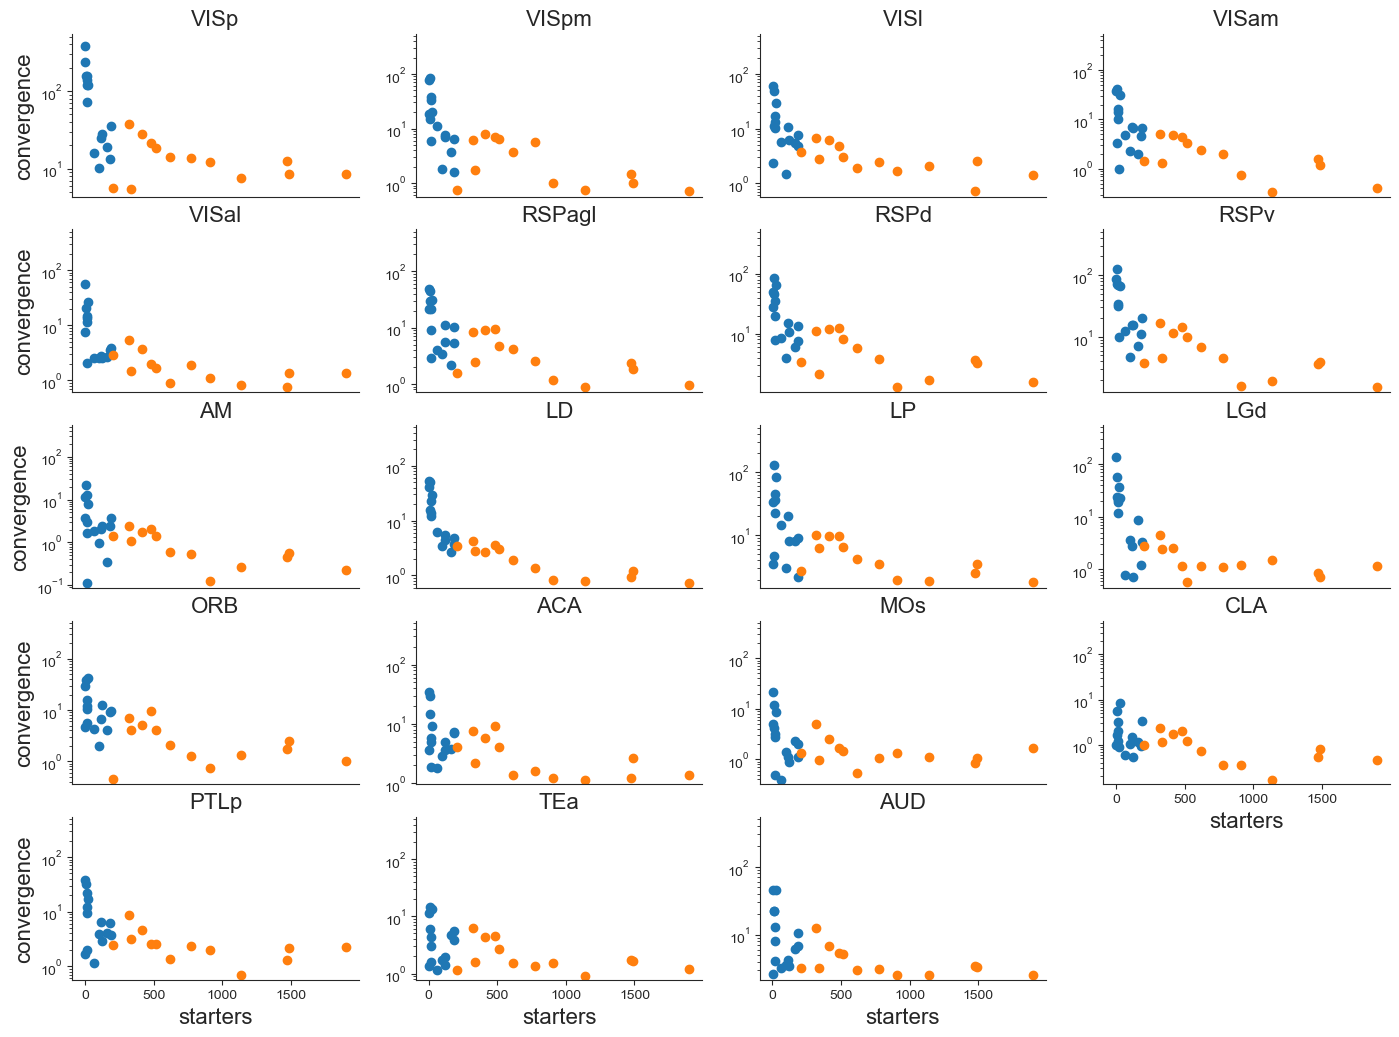

In [10]:
f2 = plt.figure(figsize = (17, 25))

gs = f2.add_gridspec(10,4)

ax = {}

for i, area in enumerate(areas_sel):
#     thispars = pars_df[pars_df.area == area]
#     thispars_l = pars_df_l[pars_df_l.area == area]
#     thispars_h = pars_df_h[pars_df_h.area == area]
    if i%4 ==0 :
        ax[i] = f2.add_subplot(gs[int(i/4):int(i/4)+1, 0:1])
        ax[i].set_ylabel('convergence', fontsize = 16)
    elif i%4 == 1:
        ax[i] = f2.add_subplot(gs[int(i/4):int(i/4)+1, 1:2])
    elif i%4 ==2 :
        ax[i] = f2.add_subplot(gs[int(i/4):int(i/4)+1, 2:3])
#         ax[i].set_ylabel('input fraction', fontsize = 16)
    else:
        ax[i] = f2.add_subplot(gs[int(i/4):int(i/4)+1, 3:])
#         ax[i].yaxis.set_visible(False)
    ax[i].scatter(thiscidf_l['starter'], thiscidf_l[area])
    ax[i].scatter(thiscidf_h['starter'], thiscidf_h[area])
#     ax[i].plot(thisdf['starter'],thispars['slope'].values * thisdf['starter'] + thispars['intercept'].values, ls = '--', c = 'grey')
#     ax[i].plot(thisdf_l['starter'],thispars_l['slope'].values * thisdf_l['starter'] + thispars_l['intercept'].values, ls = '--', c = 'C0')
#     ax[i].plot(thisdf_h['starter'],thispars_h['slope'].values * thisdf_h['starter'] + thispars_h['intercept'].values, ls = '--', c = 'C1')
    ax[i].set_title(area, fontsize = 16)

    ax[i].set_yscale('log')
    ax[i].set_ylim(0, 550)
#     if area == 'VISp':
#         ax[i].set_ylim(0, 500)
#     if area in ['ORB', 'ACA', 'MOs', 'CLA', 'PTLp', 'TEa','AUD']:
#         ax[i].set_ylim(0, 50)

#     plt.locator_params(axis='y', nbins=3)        
        
    if area == 'AUD' or area == 'TEa' or area == 'PTLp' or area  == 'CLA':
        ax[i].set_xlabel('starters', fontsize = 16)
    else:
        ax[i].xaxis.set_visible(False)
        
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.savefig(os.path.join(figs42panelpaths, 'figS13.png'), bbox_inches = 'tight')
plt.savefig(os.path.join(figs42panelpaths, 'figS13.eps'), bbox_inches = 'tight', format = 'eps')